## **Assignment**

1. Proses Exploratory data analysis
2. Proses feature engineering :
 - Check Duplicated Data
 - Check Missing Value Handling
 - Outlier Analysis
3. Modelling machine learning regression : linear regression, decision tree regressor, dan random forest regressor
4. Evaluasi model
5. Kesimpulan model mana yang terbaik performanya

In [ ]:
# import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the dataset using pandas
dataset = pd.read_csv('student_scores.csv')
# displays the top 5 rows of the data
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Exploratory Data Analysis**

In [ ]:
# provides some information regarding the columns in the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# this describes the basic stat behind the dataset used
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 800x400 with 0 Axes>

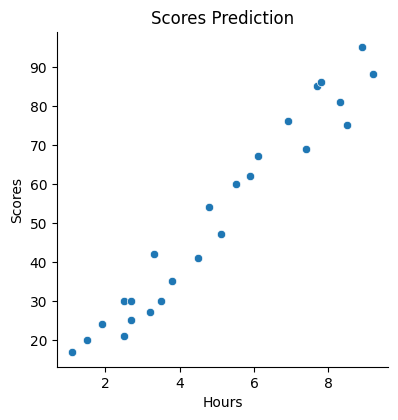

In [ ]:
# these plots help to explain the values and how they are scattered
plt.figure(figsize=(8,4))
sns.pairplot(dataset, x_vars=['Hours'], y_vars=['Scores'], size=4, kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores Prediction')
plt.show()

### **Investigate of Feature Engineering**

In [ ]:
df = dataset.copy()

In [ ]:
# check duplicate data
print("data before cleaning dup : \n")
print(df.shape)

data before cleaning : 

(25, 2)


In [ ]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [ ]:
df = df.drop_duplicates()

In [ ]:
print("data after cleaning dup : \n")
print(df.shape)

data after cleaning : 

(25, 2)


In [ ]:
# check missing value
df.isna().sum()

,0
Hours,0
Scores,0


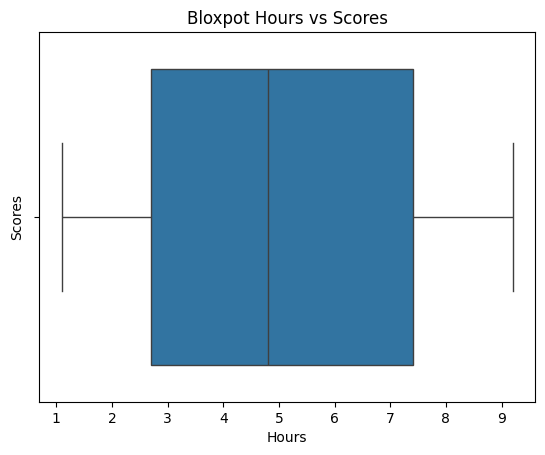

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# outlier analysis
sns.boxplot(x='Hours', data=df)

# menambahkan label sumbu dan judul
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Bloxpot Hours vs Scores')
plt.show()

### **Splitting the Data**

In [ ]:
# hours data
x = df['Hours']
x.head

<bound method NDFrame.head of 0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64>

In [ ]:
# scores data
y = df['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [ ]:
# import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
# split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15 , size train > test
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=42)
# X_train dan y_train -> knowledge dari dosen ke mahasiswa (X_train contoh soal), y_train (kunci jawaban dari contoh soal)
# X_test dan y_test -> soal2 ujian (UTS maupun UAS) (X_test), y_test (kunci jawaban dosennya / data aktual)

In [ ]:
x_train

,Hours
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9


In [ ]:
x_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9
9,2.7
13,3.3


### ***Using Linier Regression***

In [ ]:
# importing linear regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
# create new axis for x column in array
import numpy as np

# convert x_train and s_test to np array
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

# add new axis to the end
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

In [ ]:
# array
x_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
#array
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [ ]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
# fitting the model using linear regression
lr_model = LinearRegression() # Mahasiswa A
lr_model.fit(x_train,y_train) # Belajar

LinearRegression()

In [ ]:
y_pred_train = lr_model.predict(x_train)
y_pred_train

array([52.02223727, 39.39391742, 17.05150538, 33.56546211, 46.19378196,
       88.93578761, 85.05015073, 36.47968977, 28.70841601, 20.93714226,
       49.10800962, 61.73632947, 78.25028619, 55.90787415, 77.27887697,
       13.1658685 , 74.36464932, 91.85001526])

In [ ]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [ ]:
# predicting the scores for the hours values
y_pred = lr_model.predict(x_test) # UTS ataupun UAS
# y_pred -> jawaban mahasiswa linear regression

In [ ]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

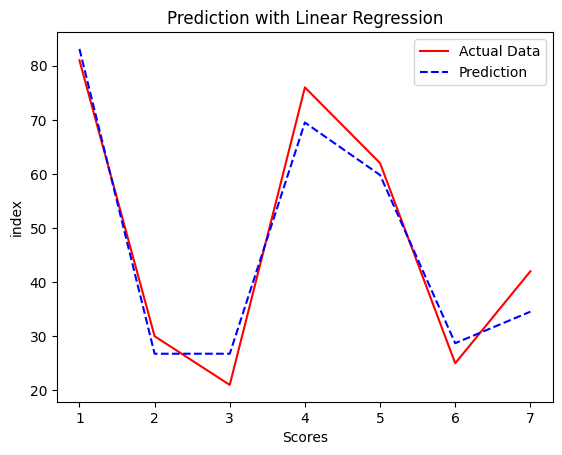

In [ ]:
# plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [ ]:
# importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# calculate R square vale
rsq = r2_score(y_test,y_pred)

In [ ]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


In [ ]:
# intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.4803670915057623
Coefficient of the line Linear Regression: [9.71409219]


## y = 2.48036 + 9.71409 x

In [ ]:
# y_test = 112635.0
# x_test = 9.6
# y = 2.48036 + 9.71409 * 9.6

nilai_y = 2.48036 + 9.71409 * 9.6
print('nilai y : ', nilai_y )

nilai y :  95.735624


### ***Using Decision Tree Regressor***

In [ ]:
from sklearn.tree import DecisionTreeRegressor # mahasiswa B

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# predicting the scores for the Test values
y_pred_dt = dt_model.predict(x_test) # soal uts maupun uas

NameError: name 'dt_model' is not defined

In [ ]:
y_pred_dt

NameError: name 'y_pred_dt' is not defined

In [ ]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

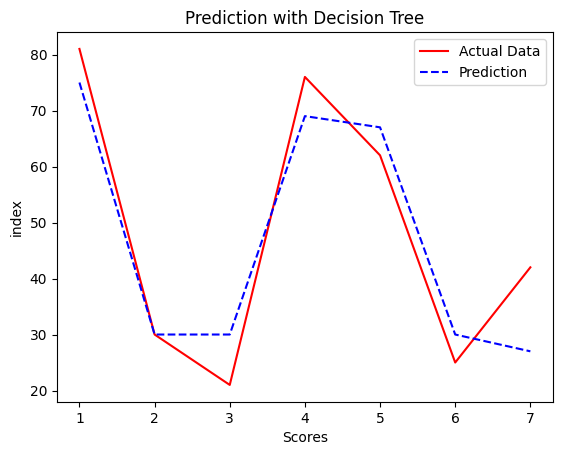

In [ ]:
# plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
# calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [ ]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8803859268443893


### ***Using Random Forest Regressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

In [ ]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# predicting the scores for the Test values
y_pred_model_rf = model_rf.predict(x_test)

In [ ]:
y_pred_model_rf

array([79.81, 28.31, 28.31, 72.83, 62.7 , 29.07, 28.23])

In [ ]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

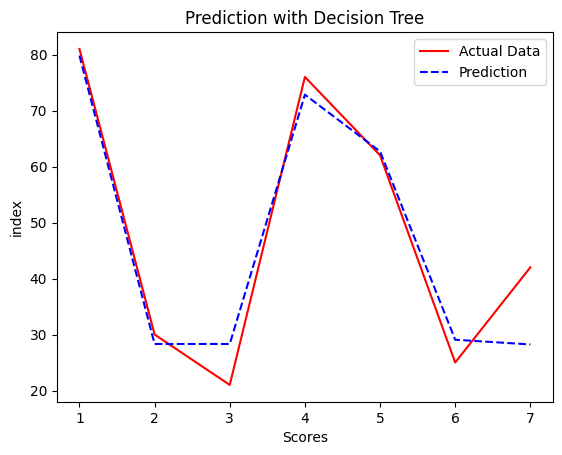

In [ ]:
# plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_model_rf,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
# calculate R square vale
rsq_model_rf = r2_score(y_test,y_pred_model_rf)

In [ ]:
print('r square Random Forest Model:',rsq_model_rf)

r square Random Forest Model: 0.925566684748915


**Model yang Dibandingkan**

1. Linear Regression
- R-Square: 0.955
- Intercept: 2.48
- Koefisien: 9.71
- Prediksi untuk skor dengan jam belajar 9.6: 95.74

2. Decision Tree Regressor
- R-Square: 0.880
- Evaluasi menunjukkan performa yang lebih rendah dibanding Linear Regression.

3. Random Forest Regressor
- R-Square: 0.926
- Performa lebih baik dibanding Decision Tree, tetapi masih sedikit di bawah Linear Regression.


**Kesimpulan**

### Model dengan Akurasi Tertinggi:
Linear Regression dengan R-Square **0.955**, menunjukkan bahwa model ini mampu menjelaskan 95.5% variabilitas data.
### Prediksi Skor:
Berdasarkan model Linear Regression, jika seorang siswa belajar selama 9.6 jam, skor yang diprediksi adalah **95.74.**